# Exploratory Data Analysis

## Method
1. univariate visualisation 单变量--- provide summary stats for each filed in the raw data set
2. bivariate visualiasation 双变量 --- performed to find the relationship between each variable and target variable of interest 
3. multivairable visualisation --- is performed to understand inteactions between different fields in the dataset
4. dimensionality reduction --- helps to understand the fields in the data that account for解释，有责任，说明原因 the most variance between observations anf allow for考虑到，顾及 the processing of a reduced volume of data. 

==> then the data scientist validates assumptions and identifies patterns that will allow for the understanding of the problem and model selection and validates that data has been generated in the way it was expected to.

==> value distribution of each field is checked, a number of missing values is defined, and the possible ways of replacing them are found.

Another benefit of EDA: specify or even define the questions you are trying to get the answer to from your data.

### Data Profiling
is concerende with summmarising the dataset through descriptive stats. You want to use a variety of measurements to bettter understand the dataset. The goal is to have a solid understanding of the dataset so that you can afterwards start querying and visualising your data in various ways. 

However this doesn't mean that you don't have to iterate: exactly because data profiling is concerned with summarising your dataset, it is frequently used to assess the data quality. Depending on the result of the data profiling, you might decide to correct, discard or handle your data differently.

## Key Concepts of EDA
* 2 types of Data Analysis
    * Confirmatory data analysis
    * Exploratory data analysis
* 4 Objectives of EDA
    * Discover Pattern
    * Spot Anomalies畸点
    * Frame Hypothesis
    * Check Assumption
* 2 methods of exploration
    * Univariate Analysis
    * Bivariate Analysis
* Stuff done during EDA
    * Trends
    * Distribution
    * Mean
    * Median
    * Outlier
    * Spread measurement (sd)
    * Correlations
    * Hypothesis testing
    * Visual Exploration

## Import data set

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
from sklearn import ensemble, tree, linear_model
import missingno as msno

In [2]:
train = pd.read_csv('/Users/lululiya/Desktop/train.csv')
test = pd.read_csv('/Users/lululiya/Desktop/test.csv')

## general look at your data

#### 1. df.describe() -pandas
funtion `df.describe()` returns a DataFrame (numerical) with informations for each columnn:(excluding NaN)

count - the number of non-empty values

mean - the average value

std - standard deviation

min, 25%, 50%, 75%, max

In [3]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [4]:
test.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


#### 2. df.head(), df.tail() -pandas
gives the first/last 5 rows of your dataset

In [5]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
train.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


#### 3. df.shape
gives the numbers of row x column of your dataset

In [7]:
train.shape

(1460, 81)

In [8]:
test.shape

(1459, 80)

## examine your training dataset - visualising missing values

### 1. Visualising the missing data

#### 1. Nullity Matrix

<Axes: >

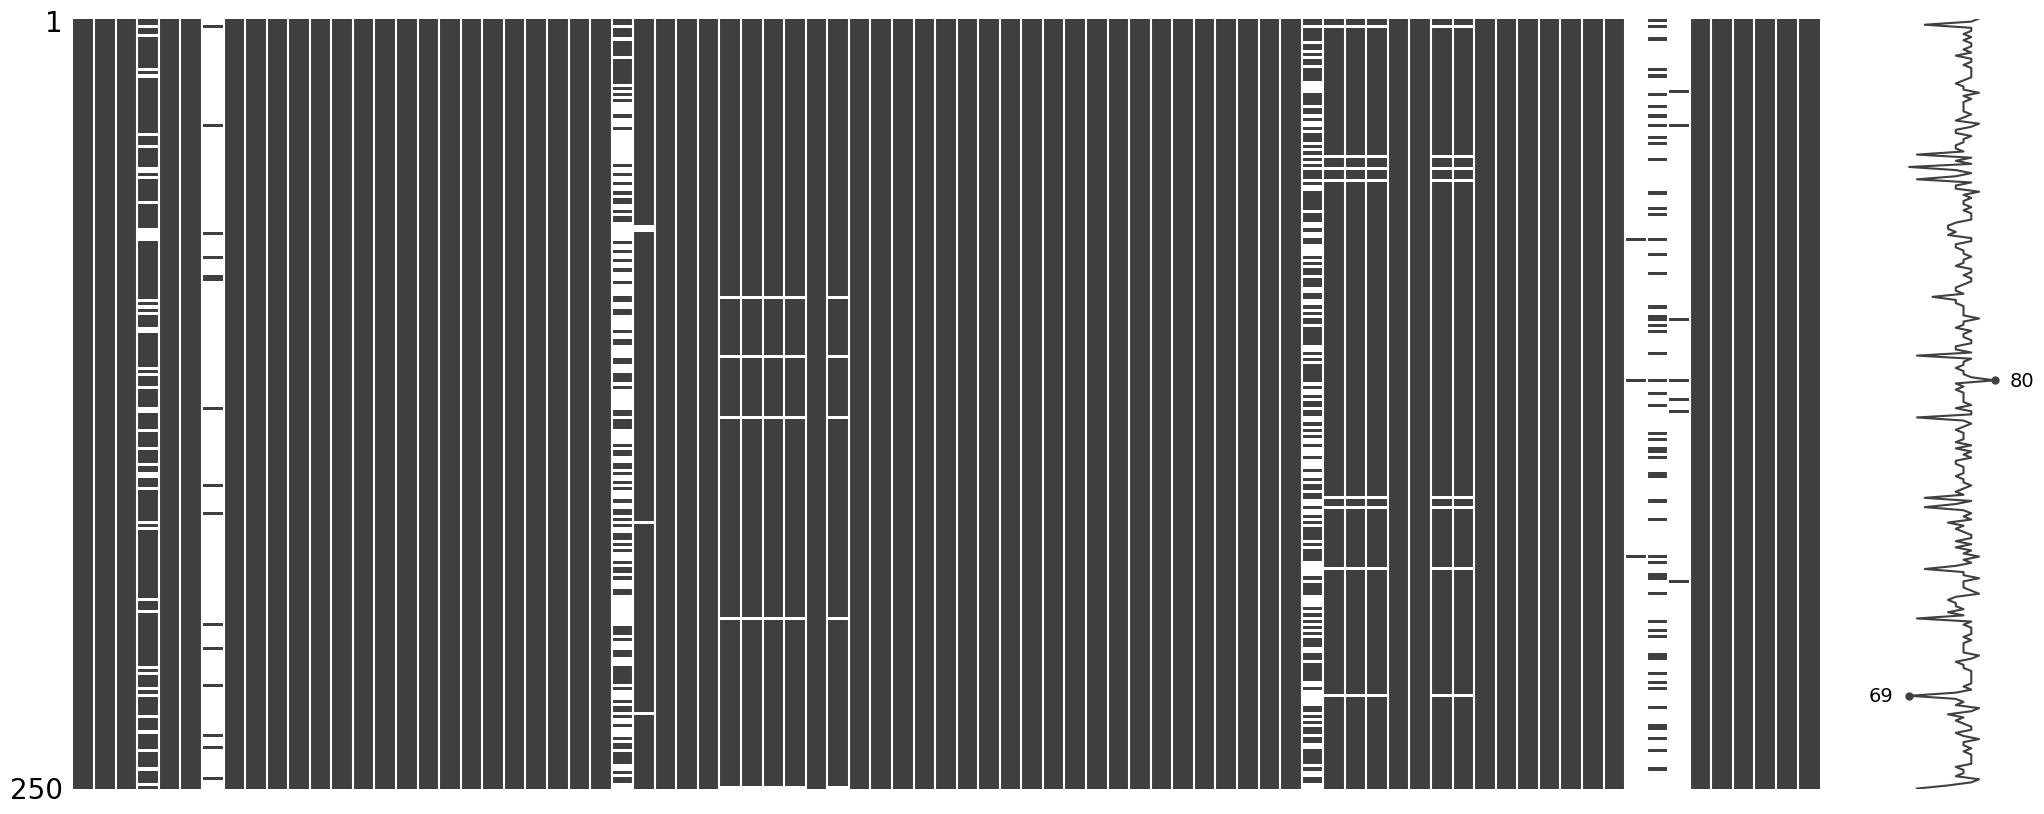

In [9]:
msno.matrix(train.sample(250))

##### Note. "missingno" library
the most common missing data is NaN (Not a number)
If missing data is presented by something other than NaN, then it should be converted to NaN using `np.NaN` in syntax of `df.replace('',np.NaN)`

and the package `missingno` provides a small toolset of flexible and easy-to-use data visualisation and utilities that allows us to get a qui visual summary of the completeness of your dataset.

`msno.matrix` -- nullity matrix is a data-dense display which lets you quickly visually pick out patterns in data completion.

The lines indicate the location of missing values.

**The sparkline at the right summarises the general shape of the data completeness and points out the rows with maximum and minimum nullity in the dataset.**<br>
- for the sparkline we can see that there are observations without any missing values and the minimum number of values is 69, even for rows with tthe max nulity

PS<br>
-[Null space]: the null space of any matrix A consists of all the vectors B such that AB=0 and Bis non-zero. It can also be thought as the solution obtained from AB=0 where A is known matrix of size mxn and B is matrix with size nxk. The size of the null space of the matrix provides us with the number of linear relations amongst attributes.---every null space vector corresponds to one linear relationship.

-[Nullity]: it can be defined as the number of vectors present in the null space of a given matrix. i.e. the dimention of the null space of the matrix A is called the nullity of A. The number of linear relations among the attributes is given by the size of the null space.


#### 2. Heatmap<br>
The `missingno` correlation heatmap meaures nullity correlation: how strongly the presence and absence of one variable affects the presence of another.<br>
variables that are always full or always empty are not included in the visualisation as they have no significant correlation.<br>
The nullity correlation ranges from -1 to 1.<br>
- -1: exact negative correlation reprents that if the value of one variable is present then the value of other variables is definnitely absent<br>
- 0 - no correlation represents that variables values presents or absent for not have any effect on one another<br>
- 1 - exact positive correlation represents that if the value of one variabel is present then the value of th eother is definitely present.

**_The heatmap works great for picking out data completeness relationships between variable pairs, but its explanatory power is limited when it comes to larger relationships and it has no particular support for extremely large datasets. For those, try the dengrogram instead._**

**msno.heatmap**(df, filter=None, n=0, <br>p=0, sort=None, figsize=(20, 12), fontsize=16, labels=True, label_rotation=45, cmap='RdBu', vmin=-1, vmax=1, cbar=True, ax=None )

msno.heatmap(train)

Or just use normal plot 

<Axes: >

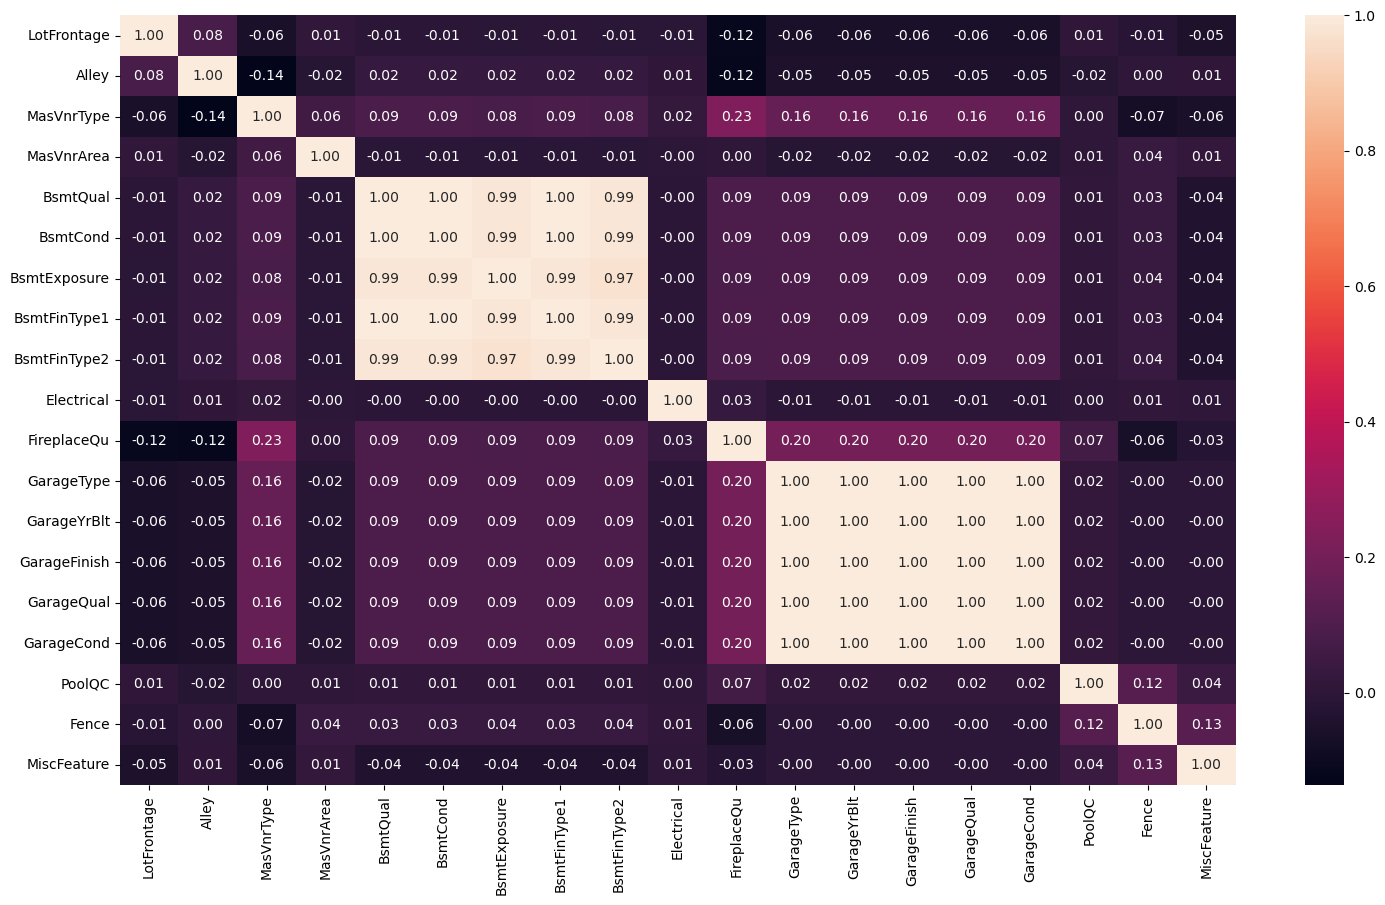

In [10]:
plt.figure(figsize=(18,10))
sns.heatmap(train.loc[:,train.isnull().any()].isnull().corr(),
            annot=True,
           fmt='.2f')

#### 3. `missingno` bar plot<br>
msno.bar is a simple visualisation of nullity by column. It allows you to visualise missing values as a bar chart.<br>
**msno.bar**_(df,figsize=None,fontsize=16,<br>labels=None,label_rotation=45,log=False,color='dimgray',<br>filter=None,n=0,p=0,sort=None,ax=None,orientation=None)_

<Axes: >

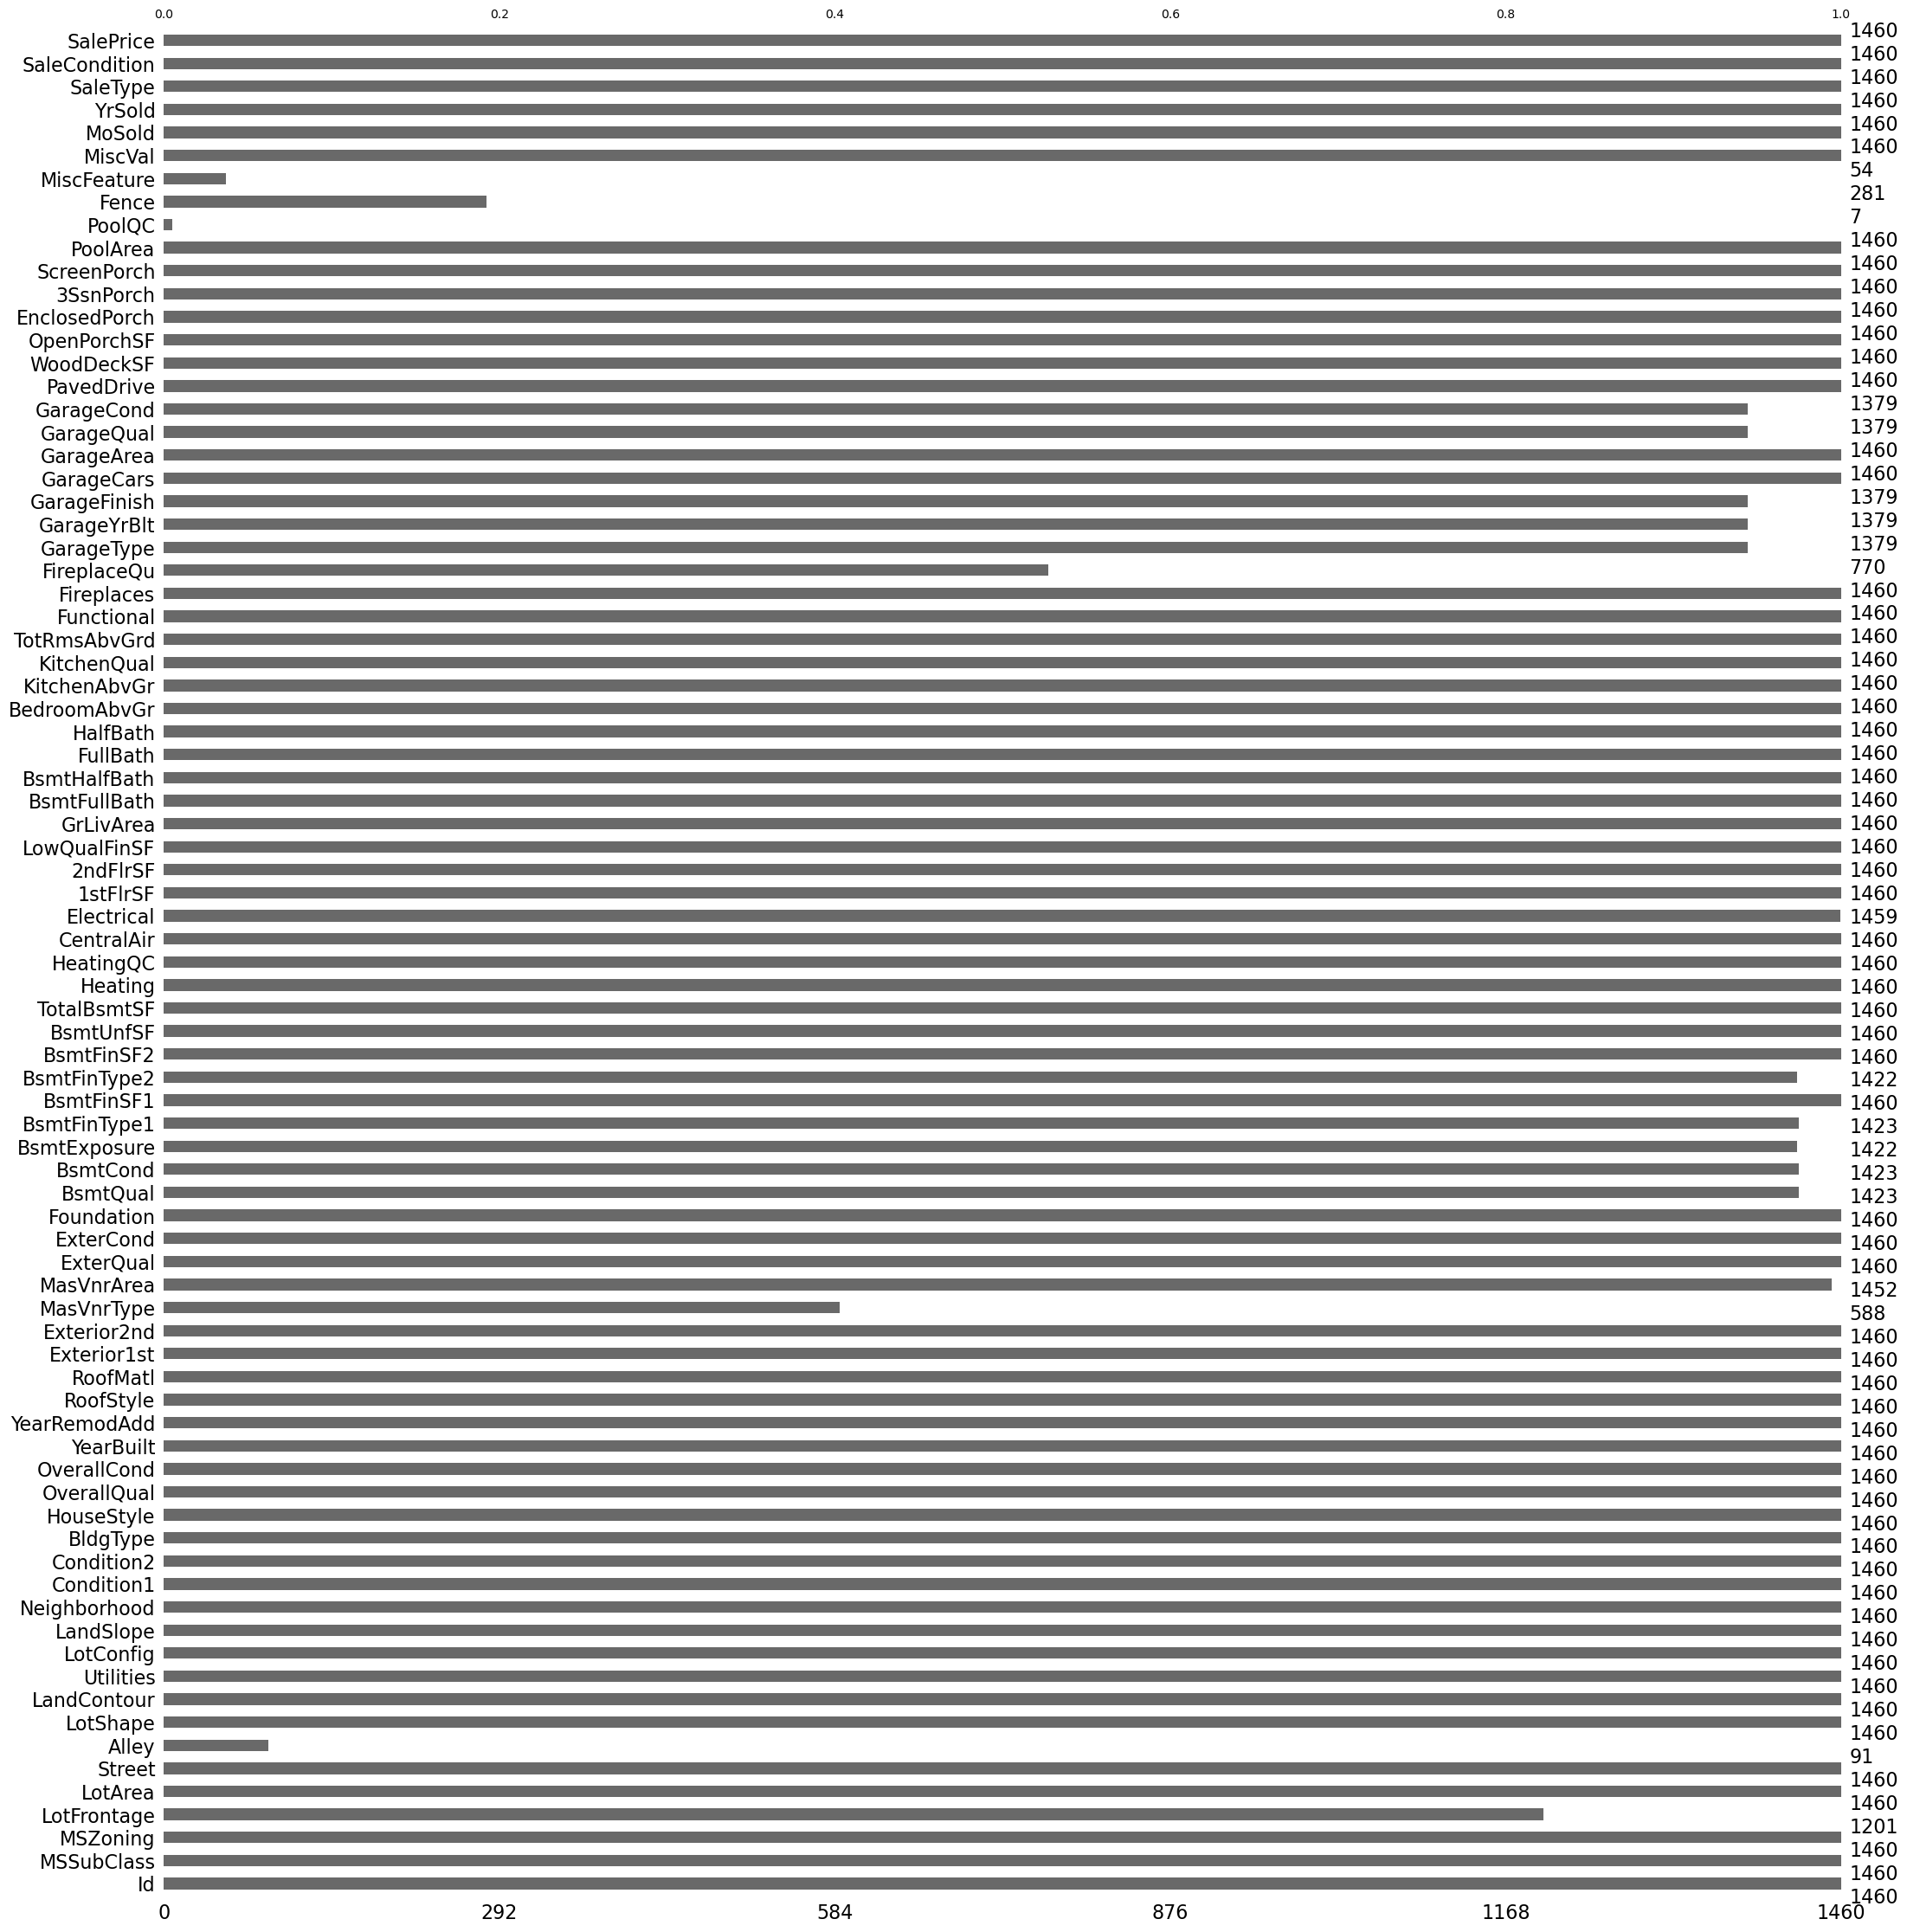

In [11]:
msno.bar(train)

it is possible to display a **logarithmic** plot eith th ehelp of the _log_ parameter

<Axes: >

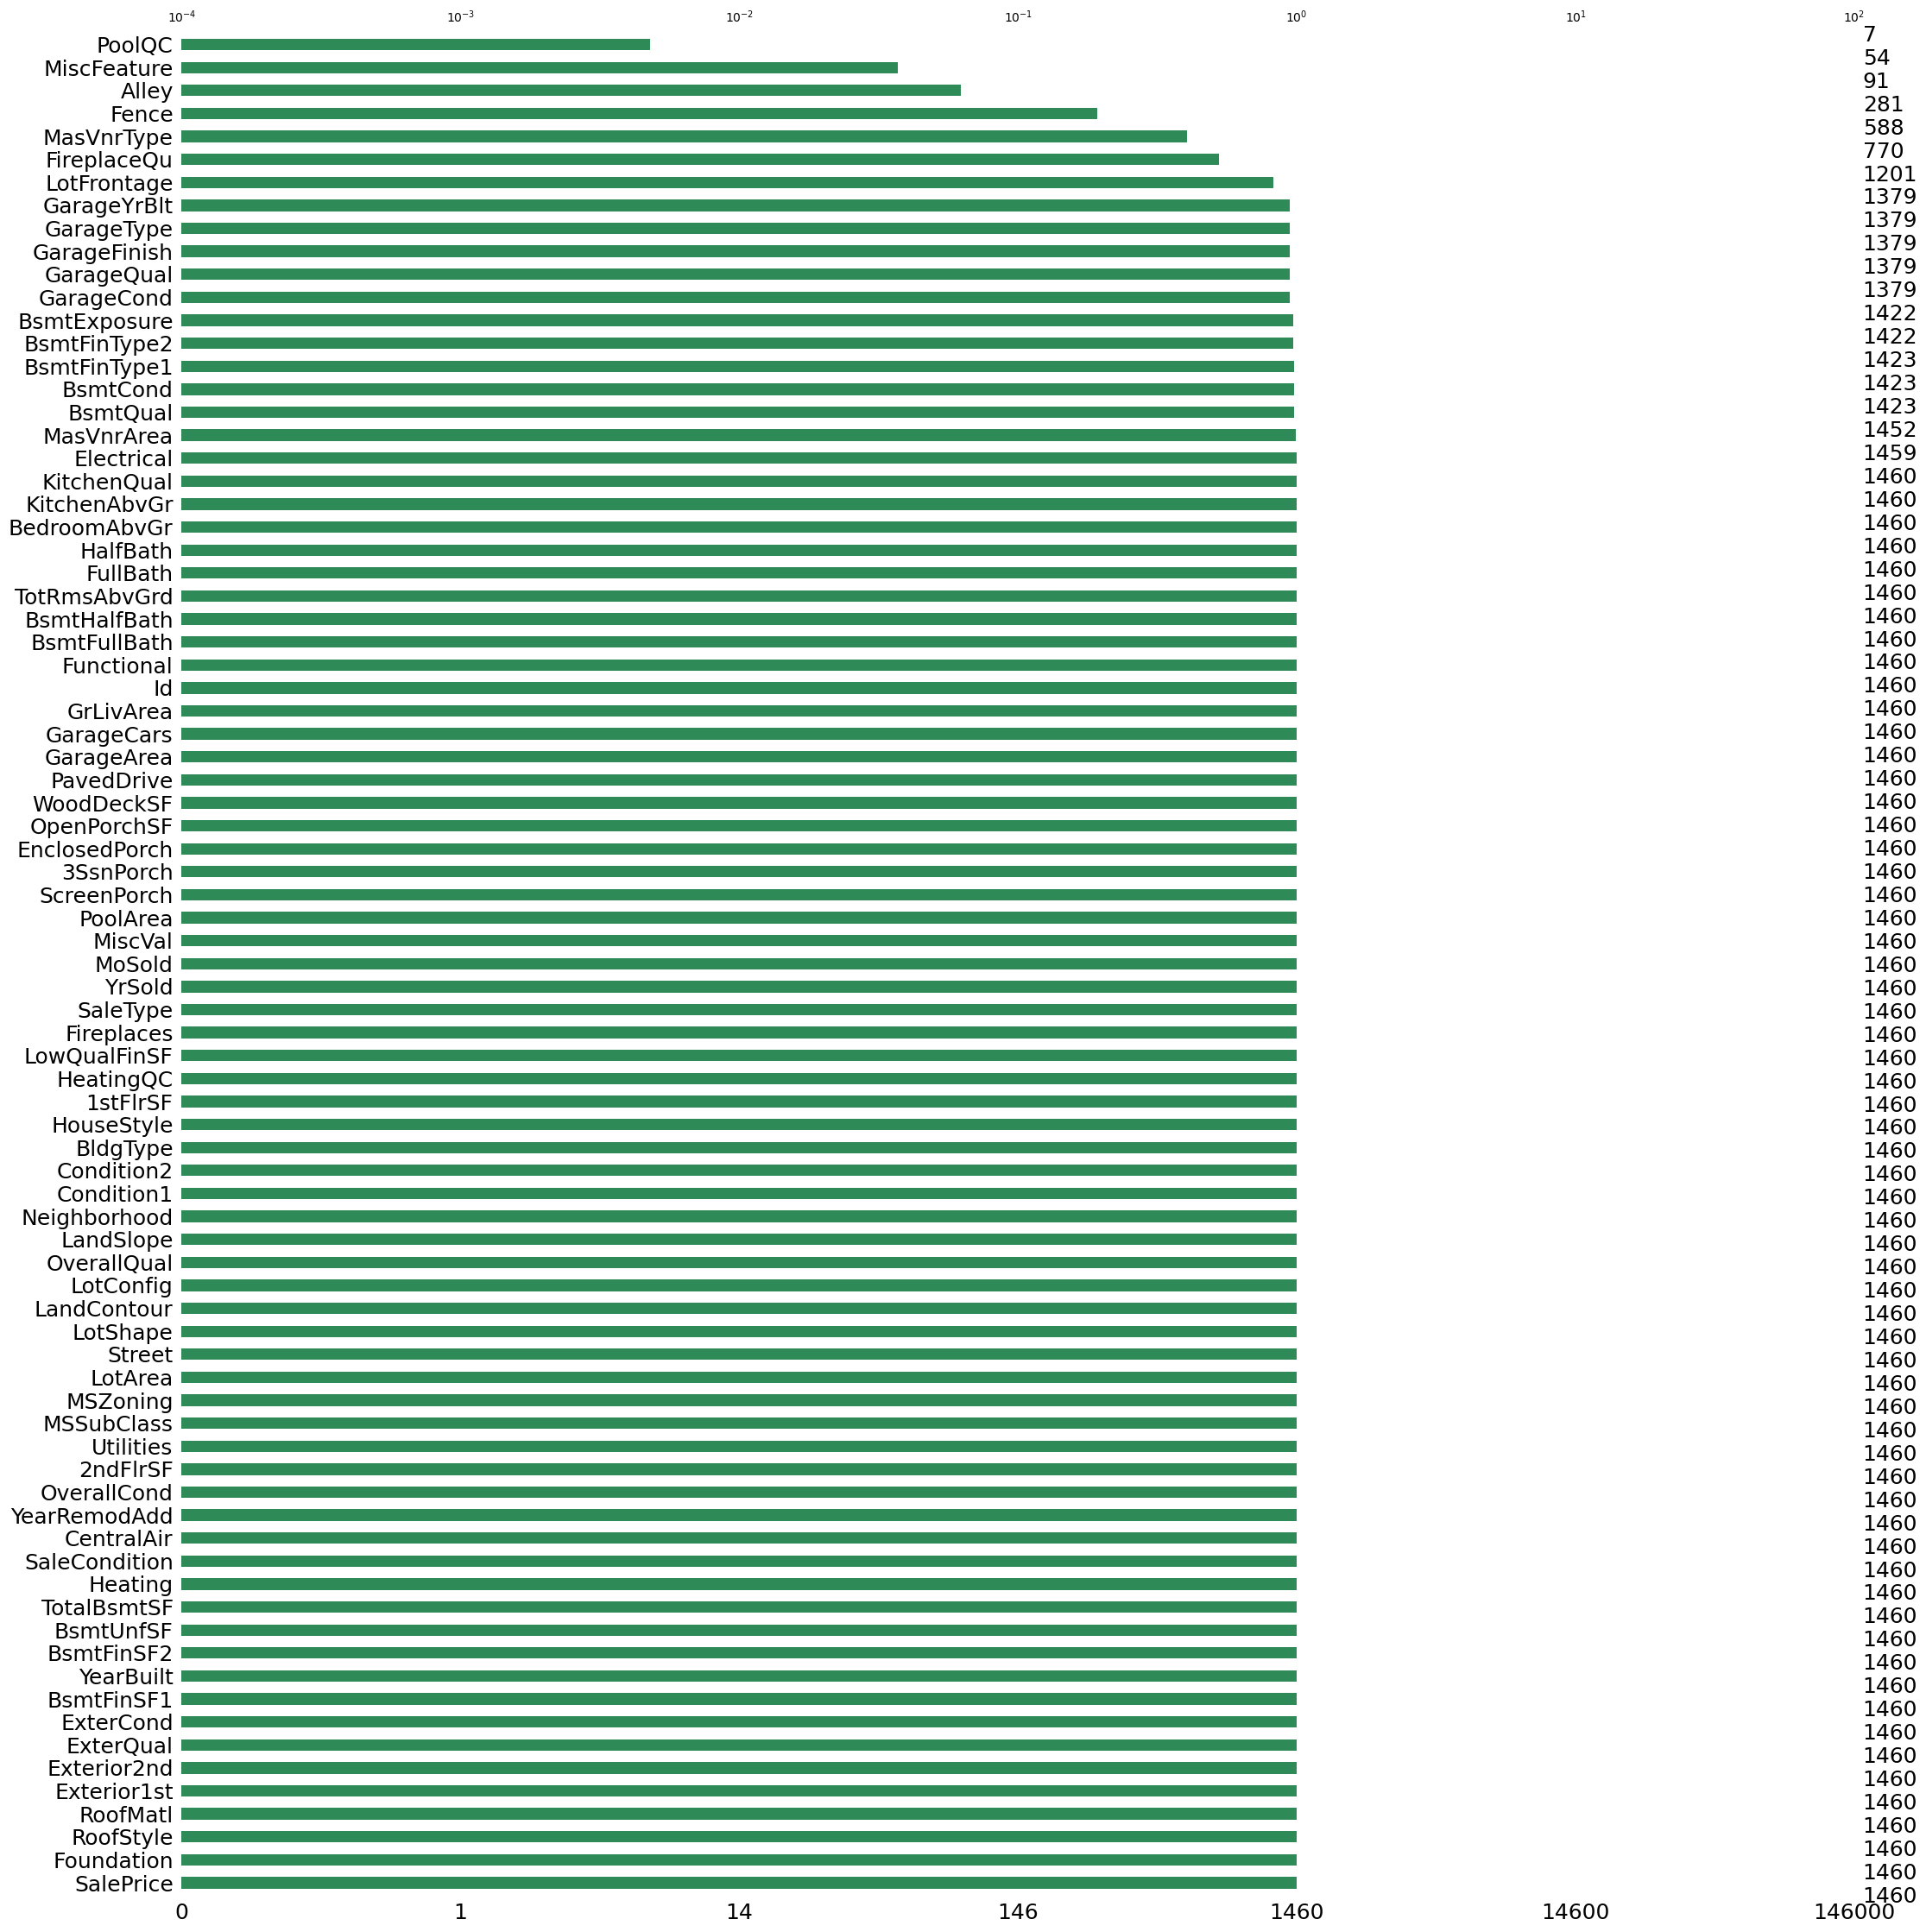

In [12]:
msno.bar(train,fontsize=18,color='seagreen',log=True,sort='descending')

#### 4. Dendrogram<br>
The dendrogram allows you to more fully correlate variable completion, revealing揭露 trends deeper than the pairwise ones visible in the correlation heatmap.<br>
It ues a hierachical clustering分层聚类 algorithm (courtesy好处 of scipy) to bin variables against one another by their nullity correlation (measured in terms of binary distance)<br>
At each step of the tree the variables are split up based on which combination minimises the distance of remaining clusters.<br>
_The more monotone the set of variabels, the closer their total distance is to zero._<br>
- To interupt the diagram, read it from a top-down perspective. Cluster leaves which linked together at a distance of zero fully predict one another's presence --- one variable might always be empty and so on.<br>
Cluster leaves which split close to zero. If your own interpretation of the dataset is that these columns actually are or oought to be match each other in nullity, then the height of the cluster oeaf tells you, in absolute terms, how often the records are "mismatched" or incorrectly filled. i.e. how many values you would have to fill in/drop, if you are so inclined.<br>
**msno.dendrogram**(df, method='average', filter=None, <br>n=0, p=0, orientation=None, figsize=None, fontsize=16, label_rotation=45, ax=None )

<Axes: >

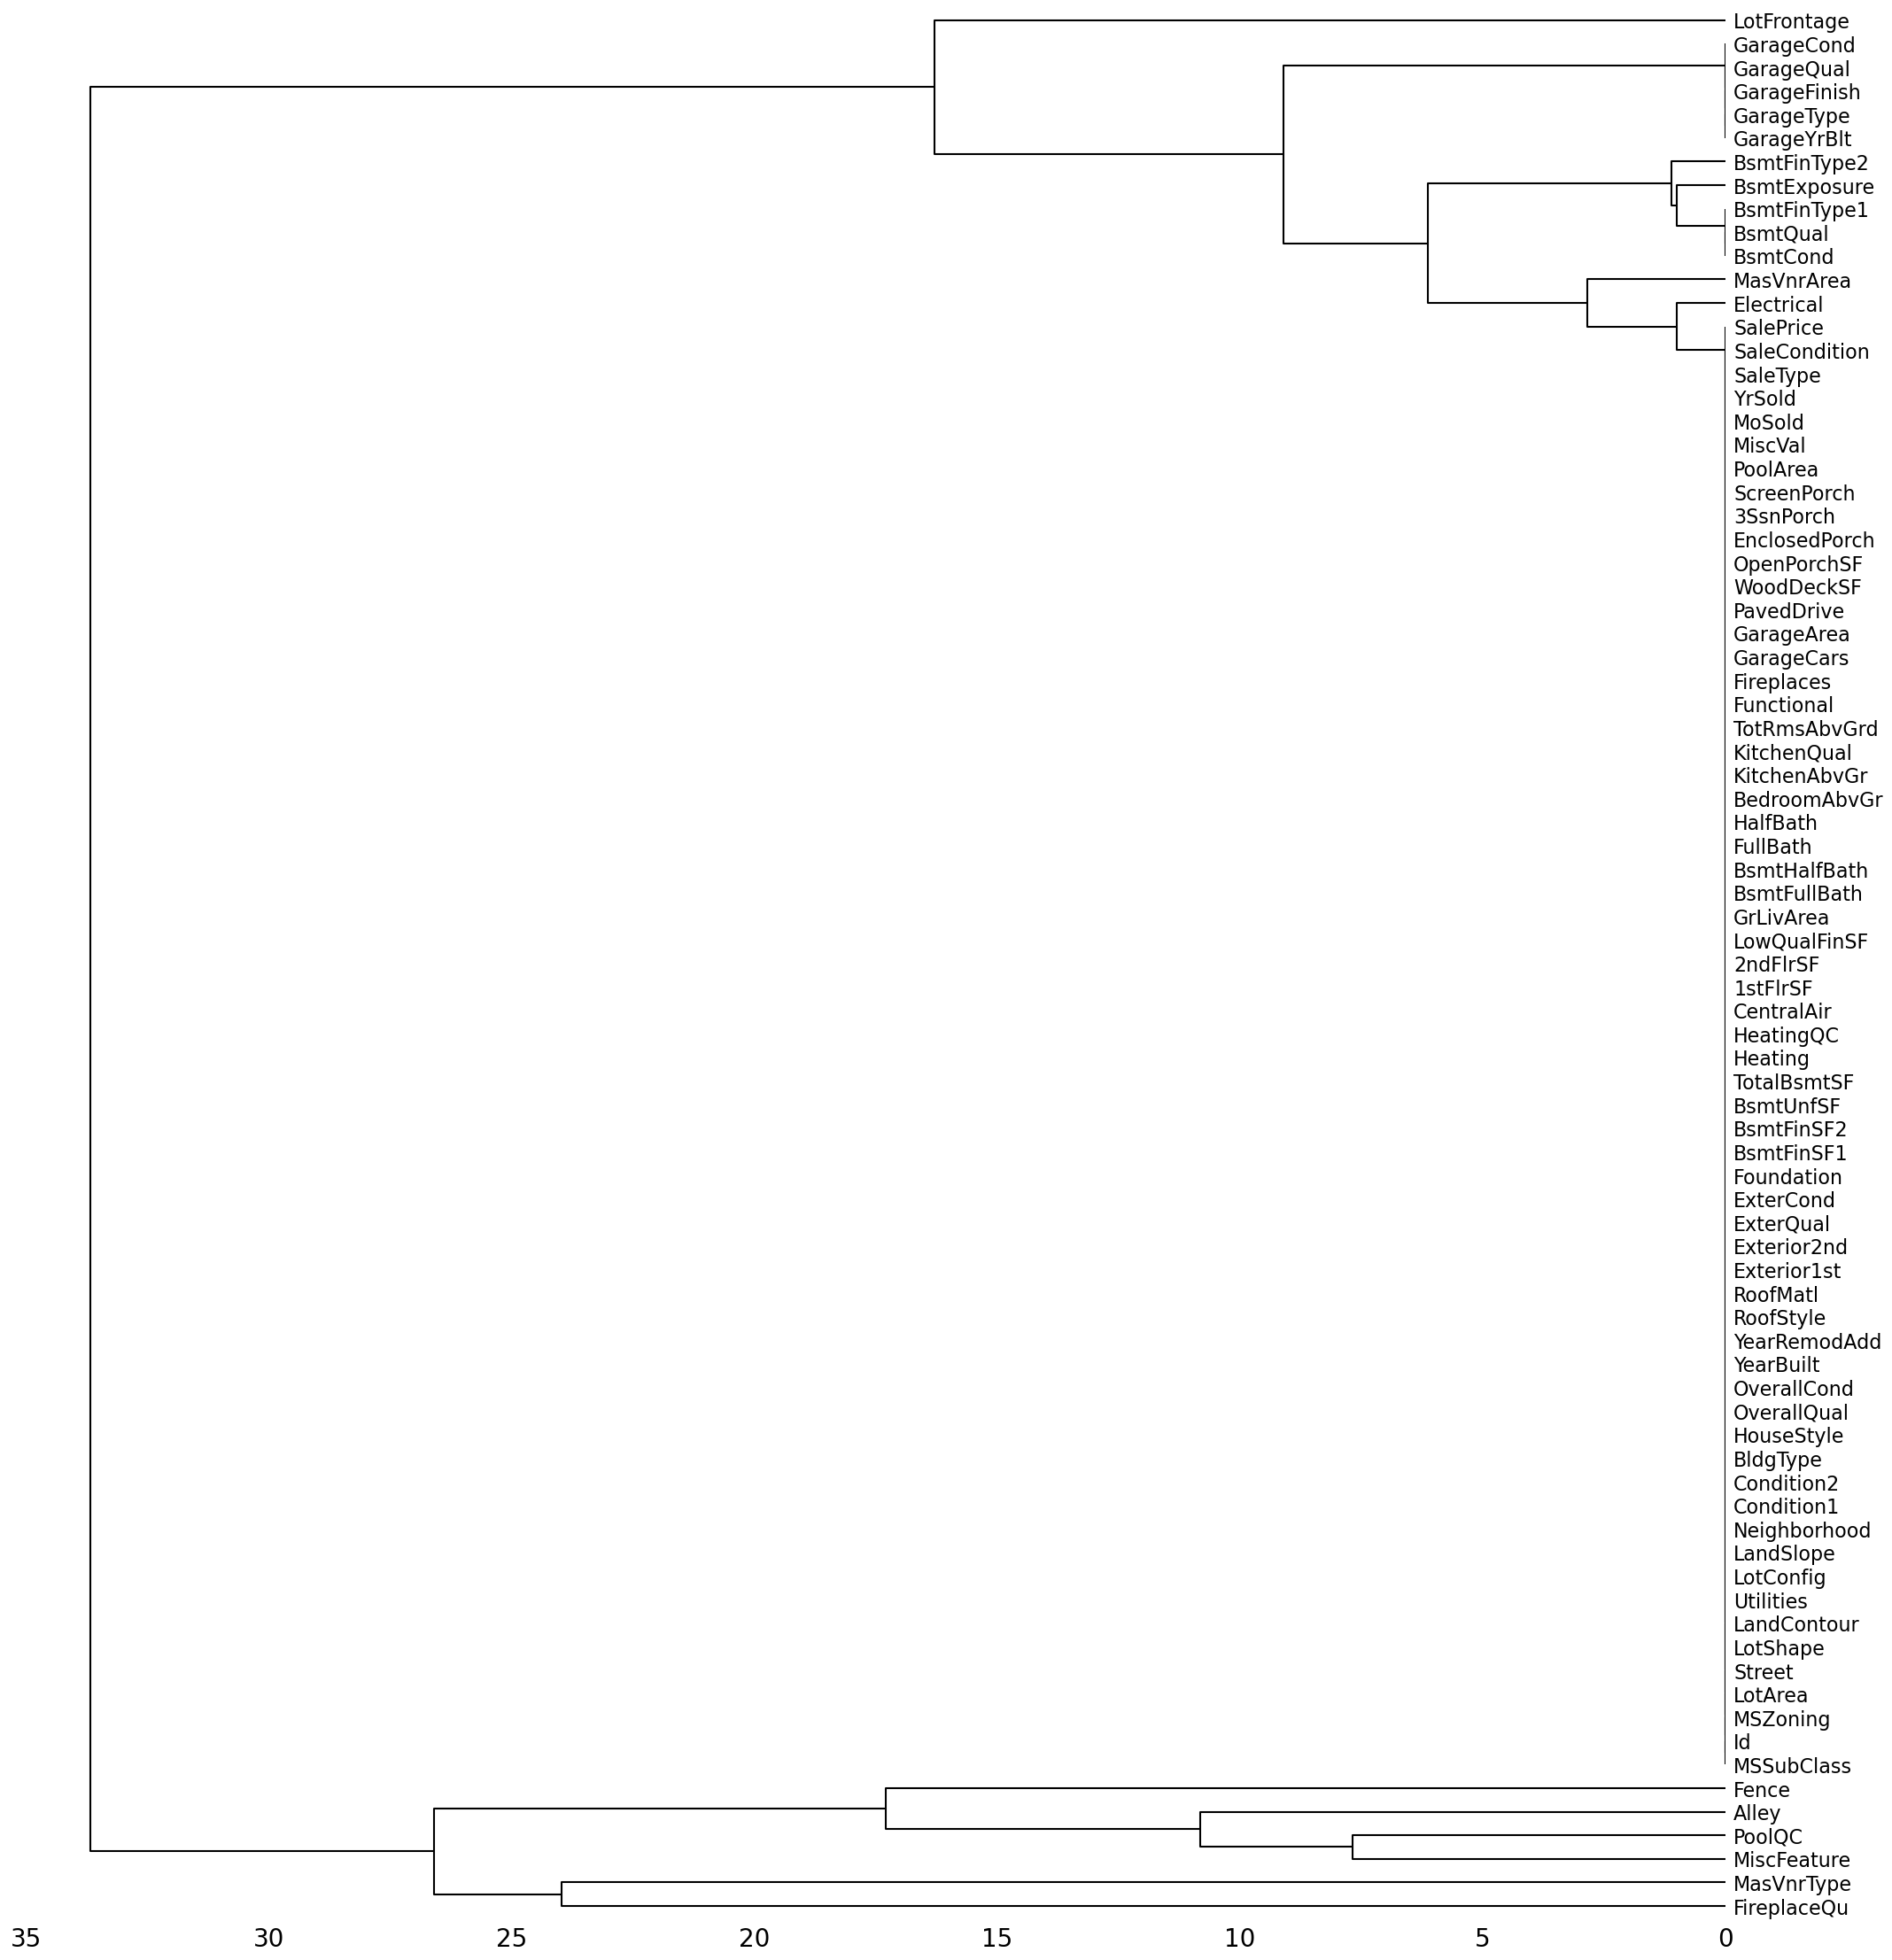

In [13]:
msno.dendrogram(train)

## the Challenges of Your Data
now that we have gathered some basic information on your data, then we can dive a little bit deeper into the challenges that the data might pose.<br>
There are 2 factors mostly observed in EDA exercise which are **missing values** and **outliers**.

### How to Handle Missing Values
#### 1. Identifying the Missing Data
##### (1) MCAR - missing completely at random<br>
this happends if all the variables and observations have the **same probability of being missing.** <br>
e.g.providing a child with Lego of different colors. The child might lose some Legos during the game. These lost legos represent missing information, just like when they cannot remember the shape or the color of the lego they had.<br>
The information was losy randomly but they do not change the information the child has on the other Legos.<br>
###### (2) MAR - missing at random<br>
For MAR, the probability of the value being missing is           **related** to the value of the variable or other variables.     This means that not all the observations and variables have     the same chance of being missed.<br>
    e.g. a survey in thr data community where data scientists       who do not frequently upgrade their skills are mor likely       not to be aware of new state-of-the-art algorithms or           technologies, hence skipping certain questions. The missing     data in this case is related to how frequently the data         scientist yoskills.<br>
###### (3)MNAR -missing not at random<br>
it is considered to be the most difficult scenario amongst the three types of missing data. It is applied when neither MAR nor MCAR apply. In this situation, the probability of being missing is completely different for different values of the same variable, and these reasons can be unkown to us.<br>
e.g. a survey about married couples. Couples with a bad relationship might not want to answer certain questions as they might feel embarrassed to do so.<br>
#### 2. Methods of Identifying Missing Data<br>
|Functions|Descriptions|
|:----:|:----:|
|`isnull()`|this function returns a pandas dataframe, where each value is a boolean value True if the value is missing. False otherwise|
|`.notnull()`|False: either NaN or None is detected|
|`.info()`|this function generated three main columns, including the "Non-Null Count" whchi shows the number of non-missing values for each column.|
|`.isna()`|similar to `.isnull()` and `.notnull()`. However it shows True only when the missing value is NaN type.|
#### 3. Handle Missing Data<br>
##### (1) Dropping<br>
    using `df.dropna()` function is the easiest way to remove       observations or features with missing values from the dataframe.<br><br>
- drop observations with missing values<br>
  a. `.dropna()` drops all the rows with missing values<br>

In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

we can see there are many missing values in each attributes, the we will use `dropna()` to drop all the missing values

In [15]:
train_drop_na = train.dropna()
train_drop_na.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             0 non-null      int64  
 1   MSSubClass     0 non-null      int64  
 2   MSZoning       0 non-null      object 
 3   LotFrontage    0 non-null      float64
 4   LotArea        0 non-null      int64  
 5   Street         0 non-null      object 
 6   Alley          0 non-null      object 
 7   LotShape       0 non-null      object 
 8   LandContour    0 non-null      object 
 9   Utilities      0 non-null      object 
 10  LotConfig      0 non-null      object 
 11  LandSlope      0 non-null      object 
 12  Neighborhood   0 non-null      object 
 13  Condition1     0 non-null      object 
 14  Condition2     0 non-null      object 
 15  BldgType       0 non-null      object 
 16  HouseStyle     0 non-null      object 
 17  OverallQual    0 non-null      int64  
 18  OverallCond    0 non-null  

then we can see that all the observations are dropped from the dataset, which can be especially **dangerous** for the rest of the analysis.<br>
 b. `dropna(how=='all')` the rows where all the column values are missing

In [16]:
train_drop_all_na = train.dropna(how='all')
train_drop_all_na.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

so we can see there is no observation with all the columns missing.<br>
  c. `dropna(thresh=minimum_value)` drop rows based on a threshold. This strategy sets a minimum number of missing values required to preserve the rows.

In [17]:
train_drop_thre_na = train.dropna(thresh=0.6)
#setting the threshold to 60%
train_drop_thre_na

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


- drop columns with missing values<br>
the parameter `axis=1` can be used to explicitly specify we are interested in columns rather than rows (axis=0-->row)<br>
 a. `dropna(axis=1)` drops all the columns with missing values

In [18]:
train_na_rows=train.dropna(axis=1)
train_na_rows

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125


then we can see there are 19 columns with missing values<br><br>
_PRO_<br>
- straighforward and simple to use<br>
- beneficial when missing values have no importance<br>

_CON_<br>
- using this apporach can lead to information loss, which can introduce bias to the final dataset.<br>
- this is not appropriate when the data is not missing completely at random<br>
- dataset with a large proportion of missing value can be significantly decreased, which can impact the result of all statsitical analysis.<br>
##### (2) Mean/Median Imputation<br>
These replacement strategies are self-exploratory. Mean and median imputations are respectively used to replace missing values of a given column with the mean and median of the non-missing valyes in that columnn.<br>
_Normal distribution_ is the ideal scenario. Unfortunately, it is not always the case. This is where the **median** imputation can be helpful because it is **not sensitive to outliers**.<br>
`.fillna()` function can be used to make these replacements.<br>
- illustration of mean imputation


In [19]:
d=[(1,'one',1.0),
   (2,'two',1.5),
   (3,'three',np.NaN),
   (4,'four',2.5)]
df = pd.DataFrame(d)
df.fillna(round(df[2].mean(),1))


,0,1,2
0,1,one,1.0
1,2,two,1.5
2,3,three,1.7
3,4,four,2.5


- illustration of median imputation<br><br>
_PRO_<br>
- simplicity and ease of implementation are some of the benefits of the mean and median imputation.<br>
- the imputation is performed using the existing information from the non-missing daya; hence no additional data is required.<br>
- mean and median impitation can provide a good estimate of the missing values, repectively for normally distibuted data and skewed data.<br>
_CON_<br>
- we cannot apply these two strategies to **categorical** columns. They can only work for numerical ones.<br>
- mean imputation is **sentitive to outliers** and may not be a good representation of the central tendency of the data. Similarlt to the mean, the median also may not better represent the _central tendenct_<br>
- median imputation makes the assumption that the data is missing cimpletely at random (MCAR), which is not always treu.<br>
##### (3) Random Sample Imputation<br>
The idea behind the random sample imputation is different from the previous ones and involves additional steps.<br>
- first, it starts by creating 2 subsets from the orginal data.<br>
- the first subset contains all the observations without missing data and the second one contains those with missing data.>br>
- then, it randomaly selects from each subset a random observation/<br>
- futhermore, the missing data from the previously selected observation is replaced with the existing ones form the observation having all the data availabel.<br>
- finally, the process continouse untill there is no more missing information.

In [20]:
"""
def random_sample_imputation(df):
   
cols_with_missing_values = df.columns[df.isna().any()].tolist()

for var in cols_with_missing_values:

    # extract a random sample
    random_sample_df = df[var].dropna().sample(df[var].isnull().sum(),
                                                  random_state=0)
    # re-index the randomly extracted sample
    random_sample_df.index = df[
            df[var].isnull()].index

    # replace the NA
    df.loc[df[var].isnull(), var] = random_sample_df
 
return df

df = sample_customer_data.copy()
random_sample_imp_df = random_sample_imputation(sample_customer_data)

"""

'\ndef random_sample_imputation(df):\n   \ncols_with_missing_values = df.columns[df.isna().any()].tolist()\n\nfor var in cols_with_missing_values:\n\n    # extract a random sample\n    random_sample_df = df[var].dropna().sample(df[var].isnull().sum(),\n                                                  random_state=0)\n    # re-index the randomly extracted sample\n    random_sample_df.index = df[\n            df[var].isnull()].index\n\n    # replace the NA\n    df.loc[df[var].isnull(), var] = random_sample_df\n \nreturn df\n\ndf = sample_customer_data.copy()\nrandom_sample_imp_df = random_sample_imputation(sample_customer_data)\n\n'

_PRO_<br>
- this is an easy snd straightforward technique.<br>
- it tackles both numeriv=cal and catrgorical data types<br>
- there is less distortion in data variance, and it also preserve the original distribution of the data, which is not the case for mean, median and more.<br>
_CON_<br>
- the randomness does not necessarily work for every situation, and this can infuse noise in the data, hence leading to incorrecr stastistical cinslusions.<br>
- similarly to the mean and median, this approach also assumes that the data is missing completely at random (MCAR)<br>
##### (4) Multiple Imputation<br>
This is a multivariate imputation technique, meaning that the missing information is filled by taking into consideration the information from the other columns.<br>
For instance, if the income value is missing for an individual, it is uncertain whether or nor they have a mortgage贷款. So, to determine the correct value, it is necessary to evaluate other characteristics such as credit score, occupation, and whether or not the individual owns a house.<br>
Multiple Imputation by Chained Equations (MICE for short) is one of the most popular imputation methods in multivariate imputation. To better understand the MICE appraoch, let's consider the set of variables X1, X2,X3,..., Xn, where some or all have missing values.<br>
The algorithm works as follows:<br>
- for each variable, replace the missing value with a simple imputation stretagy such as mean imputation, also considered as "placeholders"<br>
- the "placeholders" for the first variable, X1, are regressed by using a regression model where X1 is the dependent variable, and the rest of the variables are the independent variables. Then X2 is used as dependent variable and the rest as independent variables. The process continues as such until all the variables are considered at leat once as the dependent variable.<br>
- those original "placeholders" are then replaced with the predictions from the regression model.<br>
- the replacement process is repeated for a number of cycles which is generally 10, and the imputation is updated at each cycle.<br>
- at the end of the cycle, the missing values are ideally replaced with the prediction values that best reflect the relationships identified in the data.<br>
<br>

a. The imputation is performed using `IterativeImputer` from `sklearn`.

In [21]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

initialise the `IteratievImputer`.<br>
the default value for the number of iterations is specified using `max_iter` argument and is taken as 10. You might want to increase this if there are many missing values and takes more iterations to be accurate.

In [22]:
#define imputer
imputer = IterativeImputer(random_state=100,max_iter=10)

Train the imputer model.

In [23]:
df_1 = df.drop([0,1],axis=1)
imputer.fit(df_1)

IterativeImputer(random_state=100)

predict the missing values. This is done using `transform` method.

In [24]:
df_imputed = imputer.transform(df_1)
df_imputed[:10]

array([[1.        ],
       [1.5       ],
       [1.66666667],
       [2.5       ]])

In [25]:
#repalce the imputed values
df.loc[:,['3']]=df_imputed
df
#then the missing value in the 

,0,1,2,3
0,1,one,1.0,1.000000
1,2,two,1.5,1.500000
2,3,three,NaN,1.666667
3,4,four,2.5,2.500000


b. MICE Imputation with LightGBM using `miceforest`<br>
    MICE imputation can be made more efficient using `miceforest` package. It is expected to perform significantly better because it implements `lightgbm` algorithm in the backend to do the imputation.<br>
LightGBM is known for its high accuracy of predictions. Combining that power with the `mice` lgorithm makes it a strong algorithm for imputations.<br>
Here are some more compelling pros:<br>
- it can handle categorical variables for imputations.<br>
- you can customize how imputation happens.<br>
- it is very fast. can use GPU to go even faster.<br>
- data can be imputed in place to save memory.

furthur check link [https://www.machinelearningplus.com/machine-learning/mice-imputation/] and [https://www.datacamp.com/tutorial/techniques-to-handle-missing-data-values]

#### 4. Assessing the impact of imputation in the overall analysis<br>
it is important to keep in mind that the original dat acan not be recovered no matter the imputation technique. However it is possible to use techniques that can generate imputed data sets that are as close as possbile to reality.<be>
Below are a few key steps to consider during the assessment:<br>
- run multiple imputation techniques to identify the most robust有力的 one. This can help identyfy any bias and variations from one technique to another.<br>
- compare the finalimputed data to the original non-imputed data to assess the reliability of the imputation method.<br>
- include the imputation process in the overall analysis popeline from data cleaning to building any machine learning model.<br>
